In [1]:
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

This is a summary of the work done on July 26th. It begins with the use of specular distribution of angles for a ray source, and then applying it in the center ellipses of the FTS.  

Mira

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from raytracefunnotes import *
from random import uniform

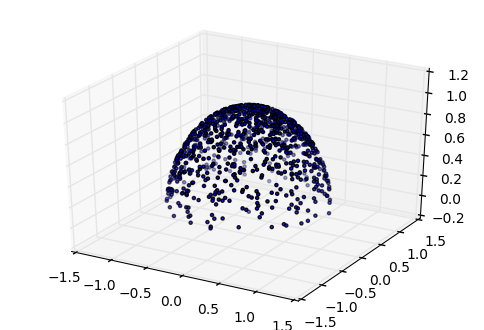

In [3]:
xspec,yspec,zspec = spec(1000)
pl3d = pl.figure().gca(projection = '3d')
pl3d.scatter(xspec,yspec,zspec,marker=".")
pl.show()

Above is the distribution of angles/vectors to be used for the spectral rays.

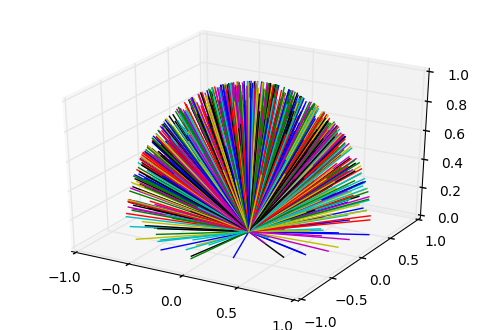

In [4]:
#first an attempt to demonstrate the different rays with this specular distribution of angles
pl3d = pl.figure().gca(projection = '3d')
origin = [0,0,0]
for i in range (1,len(xspec)):
    v = [xspec[i], yspec[i], zspec[i]]
    x2,y2,z2 = make_line(origin,v,2)
    pl.plot(x2,y2,z2)
pl.show()
#check problem in MAKE_LINE VectLNorm? does it just mean it is too small?

Above is the distribution of launch angles all from the same point (in this case the origin).

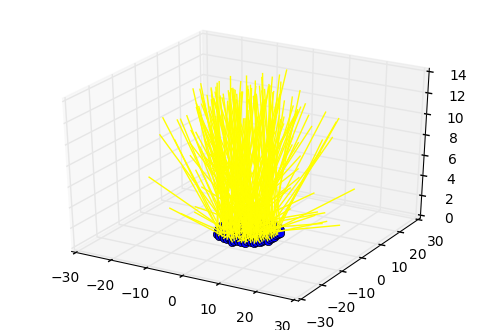

In [5]:
#NOW using points OTHER than the origin
axis = [0,0,8] #hkr
x,y,z=shape_source(axis,0) #circle and location in z-axis
points = list_points(x,y,z)
pl3d = pl.figure().gca(projection = '3d')
pl.plot(x,y,z, marker = 'o')
x3,y3,z3 = make_specsource(points,20, 0)
for n in range (0,len(points)-1):
    pl3d.plot(x3[n],y3[n],z3[n], color = 'yellow')  
pl.show()

Above is the same distribution of angles coming from different points. (these points are shown in blue at the base). 

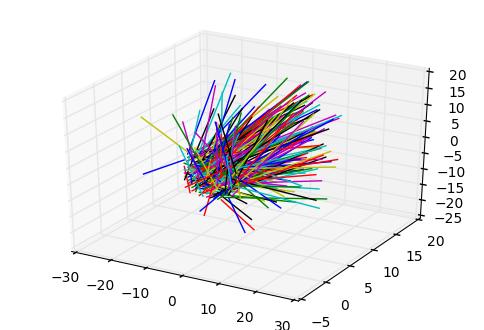

In [6]:
#NOW rotating it pi/2 WITH A ROTATED SOURCE THAT ISN'T THE ORIGIN
#NOW using points OTHER than the origin
axis = [0,0,8] #hkr
x5,y5,z5=rotated_source(np.pi/2, axis,0) #circle and location in z-axis
points5 = list_points(x5,y5,z5)
pl3d = pl.figure().gca(projection = '3d')
#pl.plot(x5,y5,z5, marker = 'o')
x6,y6,z6 = make_specsource(points5,20, np.pi/2)
for n in range (0,len(points)-1):
    pl3d.plot(x6[n],y6[n],z6[n]) #color = 'yellow')  
pl.show()

This is then that source rotated by pi/2. The next step is to apply this to the ellipses.